<font color='orange'>Ejercicio 1 Función Acumulada Ponderada</font>

Para obtener una variable aleatoria con función de probabilidad acumulada, se modelan n generadores de números random con distribución uniforme. Luego, dependiendo de la probabilidad que se obtenga se decide qué generador aplicar, esto implica la decisión de qué función inversa se agrega. Esto se repite y se guarda en una variable que describe el comportamiento de F(x). Entonces, en otras palabras, la unión de estas decisiones son la aproximación de F(x). 

El calculo del valor esperado total se representa con la siguiente ecuación. 
E[xi] = p1 * E[x1] + p2 * E[X2] ... pn * E[xn]

Para la demostración, en este caso, se obtiene E[x] = 0.2 * 1 + 0.3 * 1/2 + 0.5 * 1/3 y se compara con el promedio de la variable aleatoria calculada.

Entonces, por la ley de los números grandes, si este se aproxima se puede afirmar que es la variable aleatoria esperada. 

<font color='orange'>Ejercicio 2 Función Acumulada Ponderada(Programa)</font>

In [3]:
from random import random, uniform
from math import sqrt, log
import matplotlib.pyplot as plt
import numpy as np
from numpy import std

promedio: 0.44656324306203027 vs esperado: 0.5166666666666666
promedio: 0.5036201726374062 vs esperado: 0.5166666666666666
promedio: 0.48929057235992757 vs esperado: 0.5166666666666666
promedio: 0.4841909025083609 vs esperado: 0.5166666666666666


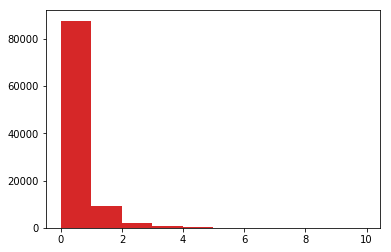

In [11]:
#F(x) = 1 - e ^ -x lambda = 1 X = ln(1 - random())
def exponencial(runs):
    records = [] 
    for i in range(runs):
        X = log(1 - random())
        records.append(X)
    plt.hist(records)
    dev = std(records)
    variance_records = dev ** 2
    print("the variance is: {0} in {1} runs".format(variance_records,runs))

#generador1
def generador1():
    # F(x) = x
    X = -(1)*log(uniform(0,1))
    return X

def generador2():
    #F(x) = 2x + 1
    # x + 2x + 1 se le agrega la anterior
    X = -(1/2)*log(uniform(0,1))
    return X
    
def generador3():
    #F(x) = 3x
    # 6x + 1
    X = -(1/3)*log(uniform(0,1))
    return X

#E[x] = 0.2 * 1 + 0.3 * 1/2 + 0.5 * 1/3  
    
def generar_variable_aleatoria(runs):
    points_for_graph = []
    for i in range(runs):
        probs = [0.2,0.3,0.5]
        point_loc = random()
        if(point_loc < probs[0]):
            #llamar al generador 1
            points_for_graph.append(generador1())
        elif(point_loc > probs[0] and point_loc <= probs[1]):
            points_for_graph.append(generador2()) 
        else:
            points_for_graph.append(generador3())
    plt.hist(points_for_graph)
    esperado = (0.2 * 1) + (0.3 * 1/2) + (0.5 * 1/3)
    analisis = np.array(points_for_graph)
    promedio = np.mean(analisis)
    print("promedio: {} vs esperado: {}".format(promedio, esperado))
#exponencial(100)
#exponencial(1000)
#exponencial(10000)

generar_variable_aleatoria(100)
generar_variable_aleatoria(1000)
generar_variable_aleatoria(10000)
generar_variable_aleatoria(100000)

<font color='orange'>Ejercicio 2 Final</font>

esperado: 0.55 vs media: 0.00023925677499609847


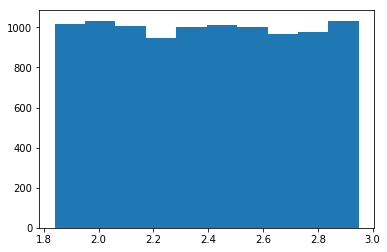

In [58]:
#exponeciales
#1: 1 - e^x de 0 a 1
#2: 1 - e^1/2x 
#primera evaluada de 0 a 1 = -1.72
#segunda evaluada de 1 a x = e^1/2x - 1.65

def generar_aleatoria(probs, fds, prob_final, residuo_ultima, runs):
    puntos_a_graficar = []
    for i in range(runs):
        probs_fds = np.multiply(probs, fds)
        accumuladas = round(np.sum(probs_fds),2)
        #variable aleatoria
        fd_final = ((random() - accumuladas)/ prob_final) + residuo_ultima
        puntos_a_graficar.append(fd_final)
        #print(fd_final)
    plt.hist(puntos_a_graficar)
    #E[x] = 1/lambda
    #E[x + y] = E[x] + E[y]
    esperado = 0.1 * 1 + 0.9 * 0.5 
    media = np.mean(puntos_a_graficar)
    media = media/runs
    print("esperado: {} vs media: {}".format(esperado, media))
generar_aleatoria(np.array([0.1]), np.array([-1.72]), 0.9, 1.65, 10000)


<font color='orange'>Ejercicio 3 Valor Presente Neto</font>

In [1]:
#uniform
from random import uniform, random
#e
from math import e, log


In [12]:
def xlambda():
    U = uniform(0,1)
    X = -1 * log(U)
    return X
    

def uniform_rand(mini,maxim):
    rango = maxim - mini
    eleccion = uniform(0,1)
    return mini + rango * eleccion

def normal_rand(mu, sigma):
    while True:
        y1 = xlambda()
        y2 = xlambda()
        if y2 - (((y1-1)**2)/2) > 0:
            y = y2 - (((y1-1)**2)/2)
            U = uniform(0,1)
            if U <= 0.5:
                return mu + (sigma * y)
            else:
                return mu - (sigma * y)

#Proyecto hotel
def proyecto_hotel(runs):
    vpn = 0
    for i in range(runs):
        t0 = -800
        t1 = normal_rand(-800, 50)
        t2 = normal_rand(-800, 100)
        t3 = normal_rand(-700, 150)
        t4 = normal_rand(300, 200)
        t5 = normal_rand(400, 200)
        t6 = normal_rand(500, 200)
        t7 = uniform_rand(200, 8440)
        vpn = vpn + t0 + (t1/(1 + 0.1)) + (t2/((1.1)**2)) + (t3/((1.1)**3)) + (t4/((1.1)**4)) + (t5/((1.1)**5)) + (t6/((1.1)**6)) + (t7/((1.1)**7))
    vpn = vpn/runs
    print("vpn proyecto hotel: {0} con {1} corridas".format(vpn, runs))
    #return vpn

def proyecto_centro_comercial(runs):
    vpn = 0
    for i in range(runs):
        t0 = -900
        t1 = normal_rand(-600, 50)
        t2 = normal_rand(-200, 100)
        t3 = normal_rand(-600, 100)
        t4 = normal_rand(250, 150)
        t5 = normal_rand(350, 150)
        t6 = normal_rand(400, 150)
        t7 = uniform_rand(1600, 6000)
        vpn = vpn + t0 + (t1/(1 + 0.1)) + (t2/((1.1)**2)) + (t3/((1.1)**3)) + (t4/((1.1)**4)) + (t5/((1.1)**5)) + (t6/((1.1)**6)) + (t7/((1.1)**7))
    vpn = vpn/runs
    print("vpn proyecto centro comercial: {0} con {1} corridas".format(vpn, runs))
    #return vpn


proyecto_hotel(100)
proyecto_centro_comercial(100)
proyecto_hotel(1000)
proyecto_centro_comercial(1000)
proyecto_hotel(10000)
proyecto_centro_comercial(10000)
proyecto_hotel(100000)
proyecto_centro_comercial(100000)


vpn proyecto hotel: 352.8607101675228 con 100 corridas
vpn proyecto centro comercial: 348.98640229058975 con 100 corridas
vpn proyecto hotel: 137.16674651377025 con 1000 corridas
vpn proyecto centro comercial: 481.9780551347425 con 1000 corridas
vpn proyecto hotel: 228.49217133521287 con 10000 corridas
vpn proyecto centro comercial: 499.33118662714605 con 10000 corridas
vpn proyecto hotel: 240.68628347527755 con 100000 corridas
vpn proyecto centro comercial: 499.336351613756 con 100000 corridas


<font color='orange'>Ejercicio 4 Repartidor de Periodicos</font>

In [13]:
import random

def devol(per, cant):
    return devolucion * (per - cant)

def simulacion(periodicos, dias):
    capital = 0

    for i in range(dias):
        randy = random.random()
        capital += -costo * periodicos

        if randy < 0.30 or periodicos < 10:
            capital += precio * 9
            capital += devol(periodicos, 9)

        elif randy < 0.70 or periodicos < 11:
            capital += precio * 10
            capital += devol(periodicos, 10)

        else:
            capital += precio * 11

    return capital

costo = 1.50
precio = 2.50
devolucion = 0.50

print("9 periodicos")
print("1 mes:   " + str(simulacion(9,31)))
print("1 año:   " + str(simulacion(9,365)))
print("10 años: " + str(simulacion(9,3650)))
print("\n")

print("10 periodicos")
print("1 mes:   " + str(simulacion(10,31)))
print("1 año:   " + str(simulacion(10,365)))
print("10 años: " + str(simulacion(10,3650)))
print("\n")

print("11 periodicos")
print("1 mes:   " + str(simulacion(11,31)))
print("1 año:   " + str(simulacion(11,365)))
print("10 años: " + str(simulacion(11,3650)))

9 periodicos
1 mes:   279.0
1 año:   3285.0
10 años: 32850.0


10 periodicos
1 mes:   292.0
1 año:   3438.0
10 años: 34332.0


11 periodicos
1 mes:   273.0
1 año:   3277.0
10 años: 32882.0


Se recomienda que compre 10 periodicos diarios.